<a href="https://colab.research.google.com/github/staffanw/Hands-On-ML-A-Geron/blob/main/kaggle_chocolate_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import os
import pandas as pd
from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np
chocolateDf = pd.DataFrame()


In [2]:
# Step 1: Authenticate
# Place kaggle.json in ~/.kaggle/ or set these environment variables
os.environ['KAGGLE_USERNAME'] = 'staffanwinter'
os.environ['KAGGLE_KEY'] = '636629f94693fac27f01438b51f0fe0b'

# Step 2: Download the dataset
!kaggle datasets download -d atharvasoundankar/chocolate-sales -p data --unzip

# Step 3: Check the file name
print(os.listdir("data"))

# Step 4: Load into pandas
chocolateDf = pd.read_csv("data/Chocolate Sales.csv")  # Update this filename if it's different
print(chocolateDf.head(10))

Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/chocolate-sales
License(s): MIT
['Chocolate Sales.csv']
      Sales Person      Country              Product       Date    Amount  \
0   Jehu Rudeforth           UK      Mint Chip Choco  04-Jan-22   $5,320    
1      Van Tuxwell        India        85% Dark Bars  01-Aug-22   $7,896    
2     Gigi Bohling        India  Peanut Butter Cubes  07-Jul-22   $4,501    
3     Jan Morforth    Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4   Jehu Rudeforth           UK  Peanut Butter Cubes  24-Feb-22  $13,685    
5      Van Tuxwell        India   Smooth Sliky Salty  06-Jun-22   $5,376    
6       Oby Sorrel           UK      99% Dark & Pure  25-Jan-22  $13,685    
7  Gunar Cockshoot    Australia          After Nines  24-Mar-22   $3,080    
8   Jehu Rudeforth  New Zealand       50% Dark Bites  20-Apr-22   $3,990    
9      Brien Boise    Australia      99% Dark & Pure  04-Jul-22   $2,835    

   Boxes Shipped  
0            1

In [3]:
chocolateDf.keys()
len(chocolateDf)

1094

In [4]:
print(chocolateDf)


          Sales Person    Country              Product       Date    Amount  \
0       Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1          Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2         Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3         Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4       Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    
...                ...        ...                  ...        ...       ...   
1089  Karlen McCaffrey  Australia  Spicy Special Slims  17-May-22   $4,410    
1090    Jehu Rudeforth        USA           White Choc  07-Jun-22   $6,559    
1091      Ches Bonnell     Canada  Organic Choco Syrup  26-Jul-22     $574    
1092    Dotty Strutley      India              Eclairs  28-Jul-22   $2,086    
1093  Karlen McCaffrey      India       70% Dark Bites  23-May-22   $5,075    

      Boxes Shipped  
0               180  
1      

In [5]:
chocolateDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [6]:
chocolateDf.value_counts()

Sales Person    Country    Product               Date       Amount    Boxes Shipped
Wilone O'Kielt  USA        Smooth Sliky Salty    18-Jan-22  $504      87               1
Andria Kimpton  Australia  50% Dark Bites        02-Jun-22  $4,438    227              1
                           85% Dark Bars         23-Aug-22  $4,186    233              1
                           Almond Choco          25-Apr-22  $3,192    175              1
                           Baker's Choco Chips   09-Aug-22  $329      109              1
                                                                                      ..
                Canada     Eclairs               11-Aug-22  $308      125              1
                           Caramel Stuffed Bars  03-Jan-22  $7,154    348              1
                           After Nines           11-May-22  $2,163    70               1
                           70% Dark Bites        08-Apr-22  $10,262   15               1
                Australia  Peanut Butter Cubes   20-Apr-22  $6,678    148              1
Name: count, Length: 1094, dtype: int64

In [7]:
chocolateDf.value_counts("Country")


,count
Country,
Australia,205
India,184
USA,179
UK,178
Canada,175
New Zealand,173


In [10]:
country_to_part = {
	'Australia': 0.014,
	'India':  0.750,
	'USA': 0.178,
	'UK': 0.036,
	'Canada' : 0.021,
	'New Zealand': 0.003
}

chocolateDf['part'] = chocolateDf['Country'].map(country_to_part)

In [11]:
chocolateDf.value_counts("Product")

,count
Product,
50% Dark Bites,60
Eclairs,60
Smooth Sliky Salty,59
White Choc,58
Drinking Coco,56
Spicy Special Slims,54
Organic Choco Syrup,52
85% Dark Bars,50
Fruit & Nut Bars,50


In [12]:
chocolateDf.describe()

,Boxes Shipped,part
count,1094.000000,1094.000000
mean,161.797989,0.167581
std,121.544145,0.268501
min,1.000000,0.003000
25%,70.000000,0.014000
50%,135.000000,0.021000
75%,228.750000,0.178000
max,709.000000,0.750000


In [13]:
chocolateDf.keys()

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'part'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(chocolateDf, test_size=0.2, random_state=42)
len(test_set)

219

In [15]:
len(train_set)


875

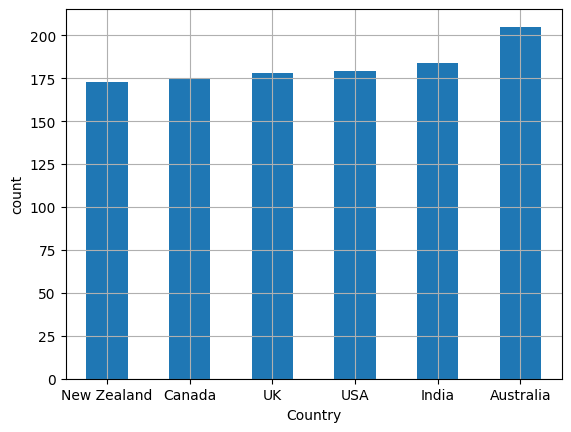

In [16]:

chocolateDf['Country'].value_counts().sort_values().plot.bar(rot=0, grid=True)
plt.xlabel("Country")
plt.ylabel("count")
plt.show()

In [18]:
strat_train_set , strat_test_set = train_test_split(
    chocolateDf, test_size=0.2, stratify=chocolateDf["part"], random_state=42  )


In [19]:
strat_test_set["Country"].value_counts() / len(strat_test_set)

,count
Country,
Australia,0.187215
India,0.168950
UK,0.164384
USA,0.164384
Canada,0.159817
New Zealand,0.155251


In [26]:
chocolateDf.keys()

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'part'],
      dtype='object')

In [28]:
corr_matrix = chocolateDf.corr(numeric_only=True)

corr_matrix["Boxes Shipped"].sort_values(ascending=False)


,Boxes Shipped
Boxes Shipped,1.000000
part,-0.014127


<Axes: xlabel='part', ylabel='Boxes Shipped'>

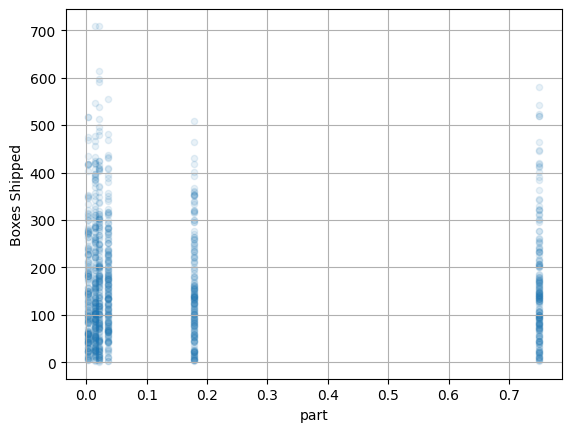

In [30]:
chocolateDf.plot(kind="scatter", x="part", y= "Boxes Shipped", alpha=0.1, grid=True)


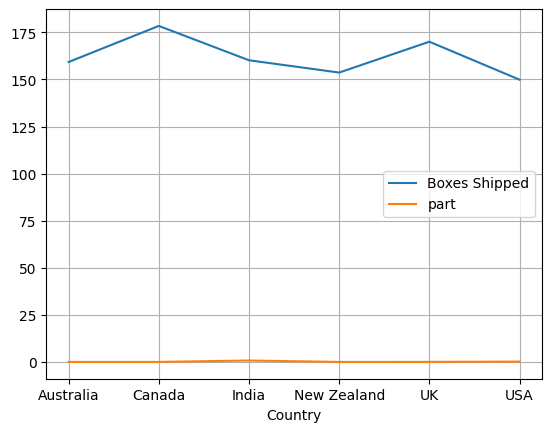

In [51]:
grouped = chocolateDf.groupby("Country").mean(numeric_only=True)
grouped.plot(kind="line", rot=0, grid=True)
plt.show()